## **1.0 Preparando os Dados**

## **1.2 Preparando o Ambiente**

### PySpark

PySpark é uma interface para Apache Spark em Python. Ele não apenas permite que você escreva aplicativos Spark usando APIs Python, mas também fornece o *shell* PySpark para analisar interativamente seus dados em um ambiente distribuído. O PySpark oferece suporte à maioria dos recursos do Spark, como Spark SQL, DataFrame, Streaming, MLlib (Machine Learning) e Spark Core.

<center><img src="https://caelum-online-public.s3.amazonaws.com/2273-introducao-spark/01/img-001.png"/></center>

#### **Spark SQL e DataFrame**

Spark SQL é um módulo Spark para processamento de dados estruturados. Ele fornece uma abstração de programação chamada DataFrame e também pode atuar como mecanismo de consulta SQL distribuído.

#### **Spark Streaming**

Executando em cima do Spark, o recurso de *streaming* no Apache Spark possibilita o uso de poderosas aplicações interativas e analíticas em *streaming* e dados históricos, enquanto herda a facilidade de uso do Spark e as características de tolerância a falhas.

#### **Spark MLlib**

Construído sobre o Spark, MLlib é uma biblioteca de aprendizado de máquina escalonável que fornece um conjunto uniforme de APIs de alto nível que ajudam os usuários a criar e ajustar *pipelines* de aprendizado de máquina práticos.

#### **Spark Core**

Spark Core é o mecanismo de execução geral subjacente para a plataforma Spark sobre o qual todas as outras funcionalidades são construídas. Ele fornece um RDD (*Resilient Distributed Dataset*) e recursos de computação na memória.

<font size=2>**Fonte:** [PySpark](https://spark.apache.org/docs/latest/api/python/index.html)</font>

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=8f4ff85010df763f691d4b54dbd402ccd4507ab02552e586eed920536919b309
  Stored in directory: /root/.cache/pip/wheels/9f/34/a4/159aa12d0a510d5ff7c8f0220abbea42e5d81ecf588c4fd884
Successfully built pyspark


### SparkSession

O ponto de entrada para programar o Spark com a API Dataset e DataFrame.

Uma SparkSession pode ser utilizada para criar DataFrames, registrar DataFrames como tabelas, executar consultas SQL em tabelas, armazenar em cache e ler arquivos parquet. Para criar uma SparkSession, use o seguinte padrão de construtor:

<font size=2>**Fonte:** [SparkSession](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.SparkSession.html)</font>

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.master('local[*]').appName("Classificação com Spark").getOrCreate()
spark

## **1.3 Carregamento dos Dados**

In [ ]:
dados = spark.read.csv('dados_clientes.csv', sep=',', header=True, inferSchema=True)

In [ ]:
dados.show()

+---+-----+----------+-------+-----------+---------------+------------+------------------------+-----------+------------------+------------------+------------------+------------------+------------------+------------------+------------+------------+----------------+-------------+
| id|Churn|Mais65anos|Conjuge|Dependentes|MesesDeContrato|TelefoneFixo|MaisDeUmaLinhaTelefonica|   Internet|   SegurancaOnline|      BackupOnline| SeguroDispositivo|    SuporteTecnico|           TVaCabo|   StreamingFilmes|TipoContrato|ContaCorreio| MetodoPagamento|MesesCobrados|
+---+-----+----------+-------+-----------+---------------+------------+------------------------+-----------+------------------+------------------+------------------+------------------+------------------+------------------+------------+------------+----------------+-------------+
|  0|  Nao|         0|    Sim|        Nao|              1|         Nao|    SemServicoTelefonico|        DSL|               Nao|               Sim|              

In [ ]:
dados.select('Churn').groupBy('Churn').count().show()

+-----+-----+
|Churn|count|
+-----+-----+
|  Sim| 5174|
|  Nao| 5174|
+-----+-----+



In [ ]:
dados.printSchema()

root
 |-- id: integer (nullable = true)
 |-- Churn: string (nullable = true)
 |-- Mais65anos: integer (nullable = true)
 |-- Conjuge: string (nullable = true)
 |-- Dependentes: string (nullable = true)
 |-- MesesDeContrato: integer (nullable = true)
 |-- TelefoneFixo: string (nullable = true)
 |-- MaisDeUmaLinhaTelefonica: string (nullable = true)
 |-- Internet: string (nullable = true)
 |-- SegurancaOnline: string (nullable = true)
 |-- BackupOnline: string (nullable = true)
 |-- SeguroDispositivo: string (nullable = true)
 |-- SuporteTecnico: string (nullable = true)
 |-- TVaCabo: string (nullable = true)
 |-- StreamingFilmes: string (nullable = true)
 |-- TipoContrato: string (nullable = true)
 |-- ContaCorreio: string (nullable = true)
 |-- MetodoPagamento: string (nullable = true)
 |-- MesesCobrados: double (nullable = true)



## **1.4 Transformando os Dados**

<font size=2>**Fonte:** [Functions](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql.html#functions)</font>

In [ ]:
colunasBinarias = [
    'Churn',
    'Conjuge',
    'Dependentes',
    'TelefoneFixo',
    'MaisDeUmaLinhaTelefonica',
    'SegurancaOnline',
    'BackupOnline',
    'SeguroDispositivo',
    'SuporteTecnico',
    'TVaCabo',
    'StreamingFilmes',
    'ContaCorreio'
]

In [ ]:
from pyspark.sql import functions as f

In [ ]:
todasColunas = [f.when(f.col(c)=='Sim', 1).otherwise(0).alias(c) for c in colunasBinarias]
for coluna in reversed(dados.columns):
  if coluna not in colunasBinarias:
    todasColunas.insert(0, coluna)
todasColunas

['id',
 'Mais65anos',
 'MesesDeContrato',
 'Internet',
 'TipoContrato',
 'MetodoPagamento',
 'MesesCobrados',
 Column<'CASE WHEN (Churn = Sim) THEN 1 ELSE 0 END AS Churn'>,
 Column<'CASE WHEN (Conjuge = Sim) THEN 1 ELSE 0 END AS Conjuge'>,
 Column<'CASE WHEN (Dependentes = Sim) THEN 1 ELSE 0 END AS Dependentes'>,
 Column<'CASE WHEN (TelefoneFixo = Sim) THEN 1 ELSE 0 END AS TelefoneFixo'>,
 Column<'CASE WHEN (MaisDeUmaLinhaTelefonica = Sim) THEN 1 ELSE 0 END AS MaisDeUmaLinhaTelefonica'>,
 Column<'CASE WHEN (SegurancaOnline = Sim) THEN 1 ELSE 0 END AS SegurancaOnline'>,
 Column<'CASE WHEN (BackupOnline = Sim) THEN 1 ELSE 0 END AS BackupOnline'>,
 Column<'CASE WHEN (SeguroDispositivo = Sim) THEN 1 ELSE 0 END AS SeguroDispositivo'>,
 Column<'CASE WHEN (SuporteTecnico = Sim) THEN 1 ELSE 0 END AS SuporteTecnico'>,
 Column<'CASE WHEN (TVaCabo = Sim) THEN 1 ELSE 0 END AS TVaCabo'>,
 Column<'CASE WHEN (StreamingFilmes = Sim) THEN 1 ELSE 0 END AS StreamingFilmes'>,
 Column<'CASE WHEN (ContaCorr

In [ ]:
dados.select(todasColunas).show()

+---+----------+---------------+-----------+------------+----------------+-------------+-----+-------+-----------+------------+------------------------+---------------+------------+-----------------+--------------+-------+---------------+------------+
| id|Mais65anos|MesesDeContrato|   Internet|TipoContrato| MetodoPagamento|MesesCobrados|Churn|Conjuge|Dependentes|TelefoneFixo|MaisDeUmaLinhaTelefonica|SegurancaOnline|BackupOnline|SeguroDispositivo|SuporteTecnico|TVaCabo|StreamingFilmes|ContaCorreio|
+---+----------+---------------+-----------+------------+----------------+-------------+-----+-------+-----------+------------+------------------------+---------------+------------+-----------------+--------------+-------+---------------+------------+
|  0|         0|              1|        DSL| Mensalmente|BoletoEletronico|        29.85|    0|      1|          0|           0|                       0|              0|           1|                0|             0|      0|              0|      

In [ ]:
dataset = dados.select(todasColunas)

In [ ]:
dataset.show()

+---+----------+---------------+-----------+------------+----------------+-------------+-----+-------+-----------+------------+------------------------+---------------+------------+-----------------+--------------+-------+---------------+------------+
| id|Mais65anos|MesesDeContrato|   Internet|TipoContrato| MetodoPagamento|MesesCobrados|Churn|Conjuge|Dependentes|TelefoneFixo|MaisDeUmaLinhaTelefonica|SegurancaOnline|BackupOnline|SeguroDispositivo|SuporteTecnico|TVaCabo|StreamingFilmes|ContaCorreio|
+---+----------+---------------+-----------+------------+----------------+-------------+-----+-------+-----------+------------+------------------------+---------------+------------+-----------------+--------------+-------+---------------+------------+
|  0|         0|              1|        DSL| Mensalmente|BoletoEletronico|        29.85|    0|      1|          0|           0|                       0|              0|           1|                0|             0|      0|              0|      

## **1.5 Criando *Dummies***

In [ ]:
dataset.select(['Internet', 'TipoContrato', 'MetodoPagamento']).show()

+-----------+------------+----------------+
|   Internet|TipoContrato| MetodoPagamento|
+-----------+------------+----------------+
|        DSL| Mensalmente|BoletoEletronico|
|        DSL|       UmAno|          Boleto|
|        DSL| Mensalmente|          Boleto|
|        DSL|       UmAno|   DebitoEmConta|
|FibraOptica| Mensalmente|BoletoEletronico|
|FibraOptica| Mensalmente|BoletoEletronico|
|FibraOptica| Mensalmente|   CartaoCredito|
|        DSL| Mensalmente|          Boleto|
|FibraOptica| Mensalmente|BoletoEletronico|
|        DSL|       UmAno|   DebitoEmConta|
|        DSL| Mensalmente|          Boleto|
|        Nao|    DoisAnos|   CartaoCredito|
|FibraOptica|       UmAno|   CartaoCredito|
|FibraOptica| Mensalmente|   DebitoEmConta|
|FibraOptica| Mensalmente|BoletoEletronico|
|FibraOptica|    DoisAnos|   CartaoCredito|
|        Nao|       UmAno|          Boleto|
|FibraOptica|    DoisAnos|   DebitoEmConta|
|        DSL| Mensalmente|   CartaoCredito|
|FibraOptica| Mensalmente|Boleto

In [ ]:
dataset.groupBy('id').pivot('MetodoPagamento').agg(f.lit(1)).na.fill(0).show()

+-----+------+----------------+-------------+-------------+
|   id|Boleto|BoletoEletronico|CartaoCredito|DebitoEmConta|
+-----+------+----------------+-------------+-------------+
| 3997|     0|               0|            1|            0|
| 7554|     0|               1|            0|            0|
| 6336|     0|               1|            0|            0|
| 6357|     0|               1|            0|            0|
| 9427|     0|               0|            1|            0|
| 2659|     0|               0|            1|            0|
|  471|     0|               1|            0|            0|
| 4935|     0|               0|            1|            0|
| 4818|     0|               0|            1|            0|
| 1342|     1|               0|            0|            0|
| 1959|     0|               1|            0|            0|
| 9376|     0|               0|            1|            0|
| 2366|     0|               1|            0|            0|
| 1580|     0|               0|         

In [ ]:
Internet = dataset.groupBy('id').pivot('Internet').agg(f.lit(1)).na.fill(0)
TipoContrato = dataset.groupBy('id').pivot('TipoContrato').agg(f.lit(1)).na.fill(0)
MetodoPagamento = dataset.groupBy('id').pivot('MetodoPagamento').agg(f.lit(1)).na.fill(0)

In [ ]:
dataset\
    .join(Internet, 'id', how='inner')\
    .join(TipoContrato, 'id', how='inner')\
    .join(MetodoPagamento, 'id', how='inner')\
    .select(
        '*',
        f.col('DSL').alias('Internet_DSL'), 
        f.col('FibraOptica').alias('Internet_FibraOptica'), 
        f.col('Nao').alias('Internet_Nao'), 
        f.col('Mensalmente').alias('TipoContrato_Mensalmente'), 
        f.col('UmAno').alias('TipoContrato_UmAno'), 
        f.col('DoisAnos').alias('TipoContrato_DoisAnos'), 
        f.col('DebitoEmConta').alias('MetodoPagamento_DebitoEmConta'), 
        f.col('CartaoCredito').alias('MetodoPagamento_CartaoCredito'), 
        f.col('BoletoEletronico').alias('MetodoPagamento_BoletoEletronico'), 
        f.col('Boleto').alias('MetodoPagamento_Boleto')        
    ).drop(
        'Internet', 'TipoContrato', 'MetodoPagamento', 'DSL', 
        'FibraOptica', 'Nao', 'Mensalmente', 'UmAno', 'DoisAnos', 
        'DebitoEmConta', 'CartaoCredito', 'BoletoEletronico', 'Boleto'
    ).show()

+----+----------+---------------+-----------------+-----+-------+-----------+------------+------------------------+---------------+------------+-----------------+--------------+-------+---------------+------------+------------+--------------------+------------+------------------------+------------------+---------------------+-----------------------------+-----------------------------+--------------------------------+----------------------+
|  id|Mais65anos|MesesDeContrato|    MesesCobrados|Churn|Conjuge|Dependentes|TelefoneFixo|MaisDeUmaLinhaTelefonica|SegurancaOnline|BackupOnline|SeguroDispositivo|SuporteTecnico|TVaCabo|StreamingFilmes|ContaCorreio|Internet_DSL|Internet_FibraOptica|Internet_Nao|TipoContrato_Mensalmente|TipoContrato_UmAno|TipoContrato_DoisAnos|MetodoPagamento_DebitoEmConta|MetodoPagamento_CartaoCredito|MetodoPagamento_BoletoEletronico|MetodoPagamento_Boleto|
+----+----------+---------------+-----------------+-----+-------+-----------+------------+----------------------

In [ ]:
dataset = dataset\
    .join(Internet, 'id', how='inner')\
    .join(TipoContrato, 'id', how='inner')\
    .join(MetodoPagamento, 'id', how='inner')\
    .select(
        '*',
        f.col('DSL').alias('Internet_DSL'), 
        f.col('FibraOptica').alias('Internet_FibraOptica'), 
        f.col('Nao').alias('Internet_Nao'), 
        f.col('Mensalmente').alias('TipoContrato_Mensalmente'), 
        f.col('UmAno').alias('TipoContrato_UmAno'), 
        f.col('DoisAnos').alias('TipoContrato_DoisAnos'), 
        f.col('DebitoEmConta').alias('MetodoPagamento_DebitoEmConta'), 
        f.col('CartaoCredito').alias('MetodoPagamento_CartaoCredito'), 
        f.col('BoletoEletronico').alias('MetodoPagamento_BoletoEletronico'), 
        f.col('Boleto').alias('MetodoPagamento_Boleto')        
    ).drop(
        'Internet', 'TipoContrato', 'MetodoPagamento', 'DSL', 
        'FibraOptica', 'Nao', 'Mensalmente', 'UmAno', 'DoisAnos', 
        'DebitoEmConta', 'CartaoCredito', 'BoletoEletronico', 'Boleto'
    )

In [ ]:
dataset.show()

+----+----------+---------------+-----------------+-----+-------+-----------+------------+------------------------+---------------+------------+-----------------+--------------+-------+---------------+------------+------------+--------------------+------------+------------------------+------------------+---------------------+-----------------------------+-----------------------------+--------------------------------+----------------------+
|  id|Mais65anos|MesesDeContrato|    MesesCobrados|Churn|Conjuge|Dependentes|TelefoneFixo|MaisDeUmaLinhaTelefonica|SegurancaOnline|BackupOnline|SeguroDispositivo|SuporteTecnico|TVaCabo|StreamingFilmes|ContaCorreio|Internet_DSL|Internet_FibraOptica|Internet_Nao|TipoContrato_Mensalmente|TipoContrato_UmAno|TipoContrato_DoisAnos|MetodoPagamento_DebitoEmConta|MetodoPagamento_CartaoCredito|MetodoPagamento_BoletoEletronico|MetodoPagamento_Boleto|
+----+----------+---------------+-----------------+-----+-------+-----------+------------+----------------------

## **2.0 Criando o Primeiro Modelo**

## **2.1 Regressão Logística**


O primeiro modelo que vamos explorar é a regressão logística, ou logistic regression em inglês.

Ela parece com a regressão linear, pois o algoritmo vai criar uma reta que se "ajusta" aos nossos dados e consiga representar os dados de treino.

A diferença é que, depois que criamos essa reta e ajustamos aos valores de treino, aplicamos a Sigmoide que vai transformar os nossos valores em valores entre um intervalo de 0 e 1. A partir dessa transformação, vamos conseguir separar os nossos dados em duas classes, que no nosso caso, é se a pessoa cancelou o serviço ou não.

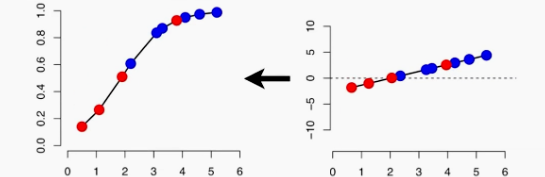

Essa imagem conta com dois gráficos; no da direita, temos uma reta que está se ajustando a dados e ligando todos os pontos. Porém, as bolinhas que representam os valores das classes têm as cores vermelha e azul.

Os círculos vermelhos representam os dados que estão em uma classe negativa, e os círculos azuis representam os dados que estão na classe positiva.


## **2.2 PREPARAÇÃO DOS DADOS** 

In [ ]:
dataset.show()

+----+----------+---------------+-----------------+-----+-------+-----------+------------+------------------------+---------------+------------+-----------------+--------------+-------+---------------+------------+------------+--------------------+------------+------------------------+------------------+---------------------+-----------------------------+-----------------------------+--------------------------------+----------------------+
|  id|Mais65anos|MesesDeContrato|    MesesCobrados|label|Conjuge|Dependentes|TelefoneFixo|MaisDeUmaLinhaTelefonica|SegurancaOnline|BackupOnline|SeguroDispositivo|SuporteTecnico|TVaCabo|StreamingFilmes|ContaCorreio|Internet_DSL|Internet_FibraOptica|Internet_Nao|TipoContrato_Mensalmente|TipoContrato_UmAno|TipoContrato_DoisAnos|MetodoPagamento_DebitoEmConta|MetodoPagamento_CartaoCredito|MetodoPagamento_BoletoEletronico|MetodoPagamento_Boleto|
+----+----------+---------------+-----------------+-----+-------+-----------+------------+----------------------

In [ ]:
from pyspark.ml.feature import VectorAssembler

In [ ]:
dataset = dataset.withColumnRenamed('Churn', 'label')

In [ ]:
X = dataset.columns
X.remove('label')
X.remove('id')
X

['Mais65anos',
 'MesesDeContrato',
 'MesesCobrados',
 'Conjuge',
 'Dependentes',
 'TelefoneFixo',
 'MaisDeUmaLinhaTelefonica',
 'SegurancaOnline',
 'BackupOnline',
 'SeguroDispositivo',
 'SuporteTecnico',
 'TVaCabo',
 'StreamingFilmes',
 'ContaCorreio',
 'Internet_DSL',
 'Internet_FibraOptica',
 'Internet_Nao',
 'TipoContrato_Mensalmente',
 'TipoContrato_UmAno',
 'TipoContrato_DoisAnos',
 'MetodoPagamento_DebitoEmConta',
 'MetodoPagamento_CartaoCredito',
 'MetodoPagamento_BoletoEletronico',
 'MetodoPagamento_Boleto']

O VectorAssembler do PySpark cria uma representação diferente das nossas features. Essa representação está ligada com o conceito de matriz densa e matriz esparsa.

Matriz densa é quando não temos uma quantidade grande de zeros. Portanto, devemos armazenar todos os valores.
Matriz esparsa tem a maior parte dos dados iguais a zero. Logo, podemos armazenar apenas os valores diferentes de zero e suas posições na matriz.

In [ ]:
assembler = VectorAssembler(inputCols=X, outputCol='features')

In [ ]:
dataset_prep = assembler.transform(dataset).select('features', 'label')

In [ ]:
dataset_prep.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(24,[1,2,11,12,13...|    1|
|(24,[1,2,3,5,6,8,...|    1|
|(24,[1,2,5,6,10,1...|    0|
|(24,[1,2,3,5,8,12...|    0|
|(24,[1,2,3,5,6,11...|    1|
|(24,[1,2,5,6,12,1...|    1|
|(24,[1,2,3,5,6,8,...|    0|
|(24,[1,2,5,6,15,1...|    0|
|(24,[1,2,3,5,7,8,...|    0|
|(24,[1,2,3,5,12,1...|    1|
|(24,[1,2,5,16,17,...|    0|
|(24,[1,2,5,8,12,1...|    0|
|(24,[1,2,3,5,6,11...|    1|
|(24,[1,2,5,6,13,1...|    0|
|(24,[1,2,5,6,8,11...|    1|
|(24,[0,1,2,3,5,6,...|    1|
|(24,[0,1,2,3,5,7,...|    0|
|(24,[1,2,5,8,14,1...|    1|
|(24,[1,2,5,16,19,...|    0|
|(24,[1,2,3,4,5,11...|    1|
+--------------------+-----+
only showing top 20 rows



In [ ]:
dataset_prep.filter(dataset_prep.label == 1).show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(24,[1,2,11,12,13...|    1|
|(24,[1,2,3,5,6,8,...|    1|
|(24,[1,2,3,5,6,11...|    1|
|(24,[1,2,5,6,12,1...|    1|
|(24,[1,2,3,5,12,1...|    1|
|(24,[1,2,3,5,6,11...|    1|
|(24,[1,2,5,6,8,11...|    1|
|(24,[0,1,2,3,5,6,...|    1|
|(24,[1,2,5,8,14,1...|    1|
|(24,[1,2,3,4,5,11...|    1|
|(24,[1,2,3,4,5,6,...|    1|
|(24,[0,1,2,3,5,6,...|    1|
|(24,[1,2,5,12,13,...|    1|
|(24,[1,2,13,14,17...|    1|
|(24,[1,2,5,12,13,...|    1|
|(24,[1,2,5,16,17,...|    1|
|(24,[1,2,5,12,13,...|    1|
|(24,[1,2,3,4,5,11...|    1|
|(24,[1,2,3,5,6,8,...|    1|
|(24,[1,2,3,4,5,6,...|    1|
+--------------------+-----+
only showing top 20 rows



## **2.3 Ajuste e Previsão**

In [ ]:
# seed vai padronizar nosso sigmoide toda vez que abrirmos o notebook
SEED = 101

In [ ]:
# criamos um df de treino e teste sendo distribuído com 70% e 30% dos dados respectivamente
treino, teste = dataset_prep.randomSplit([0.7, 0.3], seed=SEED)

In [ ]:
treino.count()

7206

In [ ]:
from pyspark.ml.classification import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
modelo_lr = lr.fit(treino)

In [ ]:
previsoes_lr_teste = modelo_lr.transform(teste)

In [ ]:
#Label = churn
#rawPrediction = representa a previsão numérica obtida diretamente do ajuste dos dados (regressão linear)
#probability = representação desses mesmos valores após terem passado por uma função de ativação sigmoide 
  #(que, por fim, determinaria o resultado da previsão: 0 ou 1).
previsoes_lr_teste.show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(24,[0,1,2,3,4,5,...|    0|[3.02174179751551...|[0.95354674000282...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|[-0.0922192966076...|[0.47696150091605...|       1.0|
|(24,[0,1,2,3,4,5,...|    1|[0.18744121711361...|[0.54672358463156...|       0.0|
|(24,[0,1,2,3,4,5,...|    1|[0.91716501260103...|[0.71446410549163...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|[-0.1495904711610...|[0.46267196467801...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[-0.1680594619286...|[0.45808374494006...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[-1.4170949608173...|[0.19511740608882...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[0.14194260698794...|[0.53542619200881...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|[0.67046644011599...|[0.66160759507905...|       0.0|
|(24,[0,1,2,3,4,

## **2.4 Métricas**

In [ ]:
resumo_lr_treino = modelo_lr.summary

In [ ]:
resumo_lr_treino.accuracy

0.7849014709963918

In [ ]:
print("Acurácia: %f" % resumo_lr_treino.accuracy)
print("Precisão: %f" % resumo_lr_treino.precisionByLabel[1])
print("Recall: %f" % resumo_lr_treino.recallByLabel[1])
print("F1: %f" % resumo_lr_treino.fMeasureByLabel()[1])

Acurácia: 0.784901
Precisão: 0.770686
Recall: 0.812517
F1: 0.791049


In [ ]:
previsoes_lr_teste.select('label', 'prediction').where((f.col('label') == 1) & (f.col('prediction') == 1)).count()

1256

In [ ]:
#criando matriz de confusão
tp = previsoes_lr_teste.select('label', 'prediction').where((f.col('label') == 1) & (f.col('prediction') == 1)).count()
tn = previsoes_lr_teste.select('label', 'prediction').where((f.col('label') == 0) & (f.col('prediction') == 0)).count()
fp = previsoes_lr_teste.select('label', 'prediction').where((f.col('label') == 0) & (f.col('prediction') == 1)).count()
fn = previsoes_lr_teste.select('label', 'prediction').where((f.col('label') == 1) & (f.col('prediction') == 0)).count()
print(tp, tn,fp, fn)

1256 1179 400 307


In [ ]:
def calcula_mostra_matriz_confusao(df_transform_modelo, normalize=False, percentage=True):
  tp = df_transform_modelo.select('label', 'prediction').where((f.col('label') == 1) & (f.col('prediction') == 1)).count()
  tn = df_transform_modelo.select('label', 'prediction').where((f.col('label') == 0) & (f.col('prediction') == 0)).count()
  fp = df_transform_modelo.select('label', 'prediction').where((f.col('label') == 0) & (f.col('prediction') == 1)).count()
  fn = df_transform_modelo.select('label', 'prediction').where((f.col('label') == 1) & (f.col('prediction') == 0)).count()

  valorP = 1
  valorN = 1

  if normalize:
    valorP = tp + fn
    valorN = fp + tn

  if percentage and normalize:
    valorP = valorP / 100
    valorN = valorN / 100

  print(' '*20, 'Previsto')
  print(' '*15, 'Churn', ' '*5 ,'Não-Churn')
  print(' '*4, 'Churn', ' '*6, int(tp/valorP), ' '*7, int(fn/valorP))
  print('Real')
  print(' '*4, 'Não-Churn', ' '*2, int(fp/valorN), ' '*7, int(tn/valorN))

In [ ]:
calcula_mostra_matriz_confusao(previsoes_lr_teste, normalize=False)

                     Previsto
                Churn       Não-Churn
     Churn        1256         307
Real
     Não-Churn    400         1179


Nesse caso temos 2435 (1256 + 1179) lojistas que o nosso modelo previu corretamente, e 22,5% o modelo errou

## **3.0 Avaliando o novo modelo**

## **3.1 Árvore de decisão**

Esse tipo de algoritmo trabalha recolhendo os dados que fornecemos para ajuste e analisando cada feature, buscando criar ramificações e calculando a pureza de cada grupo. O algoritmo repete esse processo enquanto seleciona outros valores para as features e mesmo outras features, buscando purificar o máximo possível cada grupo até criar grupos contendo somente uma classe por ramo, a qual ele chama de folha. Esse modelo realiza cálculos de ganho de informação, ou seja, calcula o quanto ele conseguiu purificar determinado ramo tomando a decisão de olhar para determinada feature e determinado valor. Se pensarmos na feature meses de contrato, o sistema pode separar os dados de 10 meses e tornar o nó mais puro, ganhando mais informação. O resultado final será uma Árvore de Decisão.

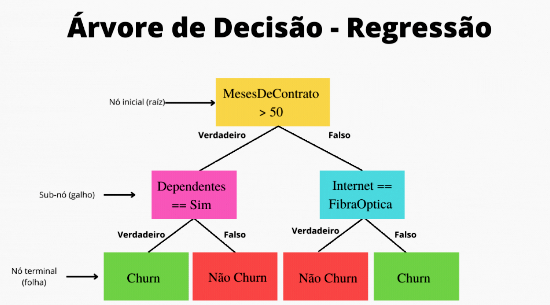

Essas árvores são muito utilizadas para resolver problemas de classificação e trazem muitas vantagens, como por exemplo:

- não serem sensíveis à escala dos nossos dados, evitando a necessidade de modificações;
- são fáceis de explicar: podemos gerar essas árvores que facilitam o entendimento das decisões tomadas pelo algoritmo.

**Critério de divisão dos nós**

Para conseguir identificar qual o melhor momento em que um nó deve ser dividido em dois ou mais subnós, o algoritmo da árvore de decisão considera alguns critérios. Os dois principais critérios de divisão usados nas árvores de decisão são:

**Índice Gini**

Este índice informa o grau de heterogeneidade dos dados. O objetivo dele é medir a frequência de um elemento aleatório de um nó ser rotulado de maneira incorreta. Em outros termos, esse índice é capaz de medir a impureza de um nó e ele é determinado por meio do seguinte cálculo:

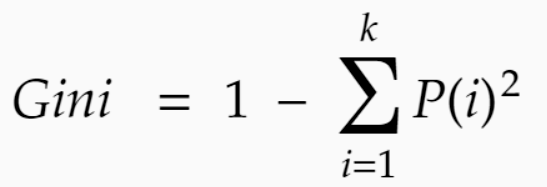

Onde:
- pi representa a frequência relativa das classes em cada um dos nós;
- k é o número de classes.

**Entropia**

A ideia básica da entropia é medir a desordem dos dados de um nó por meio da variável classificadora. Assim como o índice de Gini, ela é utilizada para caracterizar a impureza dos dados e pode ser calculada por meio da seguinte fórmula:

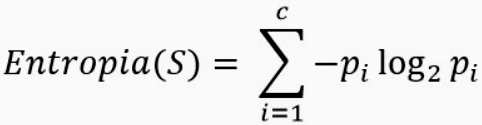

Onde:
- pi representa a proporção de dados no conjunto de dados (S), pertencentes à classe específica i;
- c é o número de classes.

## **3.2 Ajuste e Previsão**

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier(seed=SEED)

In [ ]:
modelo_dtc = dtc.fit(treino)

In [ ]:
previsoes_dtc_treino = modelo_dtc.transform(treino)

In [ ]:
previsoes_dtc_treino.show()

+--------------------+-----+--------------+--------------------+----------+
|            features|label| rawPrediction|         probability|prediction|
+--------------------+-----+--------------+--------------------+----------+
|(24,[0,1,2,3,4,5,...|    0|[2056.0,334.0]|[0.86025104602510...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|[2056.0,334.0]|[0.86025104602510...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|    [22.0,3.0]|         [0.88,0.12]|       0.0|
|(24,[0,1,2,3,4,5,...|    0|    [22.0,3.0]|         [0.88,0.12]|       0.0|
|(24,[0,1,2,3,4,5,...|    0|    [22.0,3.0]|         [0.88,0.12]|       0.0|
|(24,[0,1,2,3,4,5,...|    1|[331.0,1951.0]|[0.14504820333041...|       1.0|
|(24,[0,1,2,3,4,5,...|    0| [239.0,205.0]|[0.53828828828828...|       0.0|
|(24,[0,1,2,3,4,5,...|    1|[331.0,1951.0]|[0.14504820333041...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[331.0,1951.0]|[0.14504820333041...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[331.0,1951.0]|[0.14504820333041...|       1.0|
|(24,[0,1,2,

## **3.3 Métricas**

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
evaluator = MulticlassClassificationEvaluator()

In [ ]:
evaluator.evaluate(previsoes_dtc_treino, {evaluator.metricName: 'accuracy'})

0.7917013599777962

In [ ]:
print("Acurácia: %f" % evaluator.evaluate(previsoes_dtc_treino, {evaluator.metricName: "accuracy"}))
print("Precisão: %f" % evaluator.evaluate(previsoes_dtc_treino, {evaluator.metricName: "precisionByLabel", evaluator.metricLabel: 1}))
print("Recall: %f" % evaluator.evaluate(previsoes_dtc_treino, {evaluator.metricName: "recallByLabel", evaluator.metricLabel: 1}))
print("F1: %f" % evaluator.evaluate(previsoes_dtc_treino, {evaluator.metricName: "fMeasureByLabel", evaluator.metricLabel: 1}))

Acurácia: 0.791701
Precisão: 0.805090
Recall: 0.770978
F1: 0.787664


In [ ]:
previsoes_dtc_teste = modelo_dtc.transform(teste)

In [ ]:
previsoes_dtc_teste.show()

+--------------------+-----+--------------+--------------------+----------+
|            features|label| rawPrediction|         probability|prediction|
+--------------------+-----+--------------+--------------------+----------+
|(24,[0,1,2,3,4,5,...|    0|[2056.0,334.0]|[0.86025104602510...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|  [62.0,128.0]|[0.32631578947368...|       1.0|
|(24,[0,1,2,3,4,5,...|    1| [239.0,205.0]|[0.53828828828828...|       0.0|
|(24,[0,1,2,3,4,5,...|    1| [239.0,205.0]|[0.53828828828828...|       0.0|
|(24,[0,1,2,3,4,5,...|    0| [239.0,205.0]|[0.53828828828828...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|  [51.0,141.0]| [0.265625,0.734375]|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[331.0,1951.0]|[0.14504820333041...|       1.0|
|(24,[0,1,2,3,4,5,...|    0| [239.0,205.0]|[0.53828828828828...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|  [63.0,118.0]|[0.34806629834254...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[2056.0,334.0]|[0.86025104602510...|       0.0|
|(24,[0,1,2,

In [ ]:
evaluator.evaluate(previsoes_dtc_teste, {evaluator.metricName: 'accuracy'})

0.7714831317632082

In [ ]:
print("Acurácia: %f" % evaluator.evaluate(previsoes_dtc_teste, {evaluator.metricName: "accuracy"}))
print("Precisão: %f" % evaluator.evaluate(previsoes_dtc_teste, {evaluator.metricName: "precisionByLabel", evaluator.metricLabel: 1}))
print("Recall: %f" % evaluator.evaluate(previsoes_dtc_teste, {evaluator.metricName: "recallByLabel", evaluator.metricLabel: 1}))
print("F1: %f" % evaluator.evaluate(previsoes_dtc_teste, {evaluator.metricName: "fMeasureByLabel", evaluator.metricLabel: 1}))

Acurácia: 0.771483
Precisão: 0.778510
Recall: 0.755598
F1: 0.766883


In [ ]:
print('Decision Tree Classifier')
print("="*40)
print("Dados de Treino")
print("="*40)
print("Matriz de Confusão")
print("-"*40)
calcula_mostra_matriz_confusao(previsoes_dtc_treino, normalize=False)
print("-"*40)
print("Métricas")
print("-"*40)
print("Acurácia: %f" % evaluator.evaluate(previsoes_dtc_treino, {evaluator.metricName: "accuracy"}))
print("Precisão: %f" % evaluator.evaluate(previsoes_dtc_treino, {evaluator.metricName: "precisionByLabel", evaluator.metricLabel: 1}))
print("Recall: %f" % evaluator.evaluate(previsoes_dtc_treino, {evaluator.metricName: "recallByLabel", evaluator.metricLabel: 1}))
print("F1: %f" % evaluator.evaluate(previsoes_dtc_treino, {evaluator.metricName: "fMeasureByLabel", evaluator.metricLabel: 1}))
print("")
print("="*40)
print("Dados de Teste")
print("="*40)
print("Matriz de Confusão")
print("-"*40)
calcula_mostra_matriz_confusao(previsoes_dtc_teste, normalize=False)
print("-"*40)
print("Métricas")
print("-"*40)
print("Acurácia: %f" % evaluator.evaluate(previsoes_dtc_teste, {evaluator.metricName: "accuracy"}))
print("Precisão: %f" % evaluator.evaluate(previsoes_dtc_teste, {evaluator.metricName: "precisionByLabel", evaluator.metricLabel: 1}))
print("Recall: %f" % evaluator.evaluate(previsoes_dtc_teste, {evaluator.metricName: "recallByLabel", evaluator.metricLabel: 1}))
print("F1: %f" % evaluator.evaluate(previsoes_dtc_teste, {evaluator.metricName: "fMeasureByLabel", evaluator.metricLabel: 1}))

Decision Tree Classifier
Dados de Treino
Matriz de Confusão
----------------------------------------
                     Previsto
                Churn       Não-Churn
     Churn        2784         827
Real
     Não-Churn    674         2921
----------------------------------------
Métricas
----------------------------------------
Acurácia: 0.791701
Precisão: 0.805090
Recall: 0.770978
F1: 0.787664

Dados de Teste
Matriz de Confusão
----------------------------------------
                     Previsto
                Churn       Não-Churn
     Churn        1181         382
Real
     Não-Churn    336         1243
----------------------------------------
Métricas
----------------------------------------
Acurácia: 0.771483
Precisão: 0.778510
Recall: 0.755598
F1: 0.766883


Contudo, ainda precisamos explorar mais algoritmos para conseguir melhorar esses resultados e entregar o melhor modelo para o nosso time de marketing.



## **4.0 Comparação entre modelos**

## **4.1 Random Forest**

Pensando nisso, vamos explorar a Floresta Aleatória ou Random Forest Classifier, considerado uma evolução da árvore de decisão, pois utiliza várias delas para fazer a classificação de um novo cliente.

Ele pega os dados de treino e quebra conforme a quantidade de features que vão ser utilizados.

Por exemplo, se fornecermos 5 features para serem analisados na primeira árvore, ela seguirá o processo natural de construção, buscando a pureza do ramo e o ganho de informação, tudo isso pensando nas features.

Dessa forma, cada árvores é responsável por determinadas features e a partir dos dados de treino que fornecemos ela vai se ajustar e tomar a decisão final, se o cliente cancelará o serviço ou não.

Juntas, as árvores entram em consenso, por meio do algoritmo, para decidir qual será a classificação do dado.

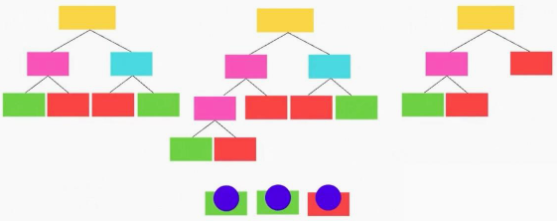

Nessa votação a maioria venceu, então a floresta decidiu classificar o novo cliente como "vai cancelar o serviço".

É assim que funciona a previsão de uma árvore de decisão, um algoritmo muito poderoso e com mais processamento, por isso é necessário avaliar se é uma opção que realmente resolver o problema de forma eficiente.

- Ao utilizar o modelo Random Forest, podemos escolher a quantidade de árvores de decisão a serem criadas. No scikit learn, podemos controlar a quantidade através do parâmetro n_estimators.
- O modelo irá criar um conjunto de dados para cada árvore a partir do método bootstrapping na base de dados original, resultando em um resultado distinto para cada uma das árvores.
- Por fim, será feita uma votação entre os resultados das árvores e a classe predita na maioria das árvores é escolhida como a classificação do modelo Random Forest.

## **4.2 Ajuste e Previsão**

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(seed=SEED)

In [ ]:
modelo_rfc = rfc.fit(treino)

In [ ]:
previsoes_rfc_treino = modelo_rfc.transform(treino)

In [ ]:
previsoes_rfc_treino.show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(24,[0,1,2,3,4,5,...|    0|[15.0052773466704...|[0.75026386733352...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|[16.9295040273249...|[0.84647520136624...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|[9.13052909106814...|[0.45652645455340...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[9.13052909106814...|[0.45652645455340...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[8.59288938528764...|[0.42964446926438...|       1.0|
|(24,[0,1,2,3,4,5,...|    1|[5.59647122885698...|[0.27982356144284...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[9.33276328267787...|[0.46663816413389...|       1.0|
|(24,[0,1,2,3,4,5,...|    1|[5.21616013157118...|[0.26080800657855...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[5.45640255581361...|[0.27282012779068...|       1.0|
|(24,[0,1,2,3,4,

analisando o DataFrame, notamos que dos cinco primeiro exemplos ele classificou que duas pessoas não cancelariam o serviço e que três cancelariam. Como nenhuma cancelou, o acerto foi de duas previsões.

## **4.3 Métricas**

In [ ]:
previsoes_rfc_teste = modelo_rfc.transform(teste)

In [ ]:
previsoes_rfc_teste.show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(24,[0,1,2,3,4,5,...|    0|[16.7433871675615...|[0.83716935837807...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|[7.27313214599648...|[0.36365660729982...|       1.0|
|(24,[0,1,2,3,4,5,...|    1|[7.46885072161585...|[0.37344253608079...|       1.0|
|(24,[0,1,2,3,4,5,...|    1|[9.33276328267787...|[0.46663816413389...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[7.79829004739264...|[0.38991450236963...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[7.13263407834549...|[0.35663170391727...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[4.45872635511159...|[0.22293631775557...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[7.84691519125130...|[0.39234575956256...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[9.94796150783366...|[0.49739807539168...|       1.0|
|(24,[0,1,2,3,4,

In [ ]:
print('Random Forest Classifier')
print("="*40)
print("Dados de Treino")
print("="*40)
print("Matriz de Confusão")
print("-"*40)
calcula_mostra_matriz_confusao(previsoes_rfc_treino, normalize=False)
print("-"*40)
print("Métricas")
print("-"*40)
print("Acurácia: %f" % evaluator.evaluate(previsoes_rfc_treino, {evaluator.metricName: "accuracy"}))
print("Precisão: %f" % evaluator.evaluate(previsoes_rfc_treino, {evaluator.metricName: "precisionByLabel", evaluator.metricLabel: 1}))
print("Recall: %f" % evaluator.evaluate(previsoes_rfc_treino, {evaluator.metricName: "recallByLabel", evaluator.metricLabel: 1}))
print("F1: %f" % evaluator.evaluate(previsoes_rfc_treino, {evaluator.metricName: "fMeasureByLabel", evaluator.metricLabel: 1}))
print("")
print("="*40)
print("Dados de Teste")
print("="*40)
print("Matriz de Confusão")
print("-"*40)
calcula_mostra_matriz_confusao(previsoes_rfc_teste, normalize=False)
print("-"*40)
print("Métricas")
print("-"*40)
print("Acurácia: %f" % evaluator.evaluate(previsoes_rfc_teste, {evaluator.metricName: "accuracy"}))
print("Precisão: %f" % evaluator.evaluate(previsoes_rfc_teste, {evaluator.metricName: "precisionByLabel", evaluator.metricLabel: 1}))
print("Recall: %f" % evaluator.evaluate(previsoes_rfc_teste, {evaluator.metricName: "recallByLabel", evaluator.metricLabel: 1}))
print("F1: %f" % evaluator.evaluate(previsoes_rfc_teste, {evaluator.metricName: "fMeasureByLabel", evaluator.metricLabel: 1}))

Random Forest Classifier
Dados de Treino
Matriz de Confusão
----------------------------------------
                     Previsto
                Churn       Não-Churn
     Churn        2950         661
Real
     Não-Churn    884         2711
----------------------------------------
Métricas
----------------------------------------
Acurácia: 0.785595
Precisão: 0.769431
Recall: 0.816948
F1: 0.792478

Dados de Teste
Matriz de Confusão
----------------------------------------
                     Previsto
                Churn       Não-Churn
     Churn        1257         306
Real
     Não-Churn    416         1163
----------------------------------------
Métricas
----------------------------------------
Acurácia: 0.770210
Precisão: 0.751345
Recall: 0.804223
F1: 0.776885


Transformando os modelos em funções para viabilizar a análise



In [ ]:
def compara_metricas_modelos(lista_previsoes):

  # ‘s’ será minha string de retorno
  # ela vai coletar e montar minha matriz de confusão
  # e também os valores de acurácia, precisão, recall e F1-score
  s = '\n'

  for modelo, df_transform_modelo in lista_previsoes.items():

    s += '-' * 50 + '\n' #linha de separação
    s += modelo + '\n'

    # os passos para montagem da matriz de confusão são os mesmos da aula
    tp = df_transform_modelo.select('label', 'prediction').where((f.col('label') == 1) & (f.col('prediction') == 1)).count()
    tn = df_transform_modelo.select('label', 'prediction').where((f.col('label') == 0) & (f.col('prediction') == 0)).count()
    fp = df_transform_modelo.select('label', 'prediction').where((f.col('label') == 0) & (f.col('prediction') == 1)).count()
    fn = df_transform_modelo.select('label', 'prediction').where((f.col('label') == 1) & (f.col('prediction') == 0)).count()

    # construção da minha string da matriz de confusão  
    s += ' '*20 + 'Previsto\n'
    s += ' '*15 +  'Churn' + ' '*5 + 'Não-Churn\n'
    s += ' '*4 + 'Churn' + ' '*6 +  str(int(tp)) + ' '*7 + str(int(fn)) + '\n'
    s += 'Real\n'
    s += ' '*4 + 'Não-Churn' + ' '*2 + str(int(fp)) +  ' '*7 + str(int(tn))  + '\n'
    s += '\n'

    # adiciono os valores de cada métrica a minha string de retorno com MulticlassClassificationEvaluator
    evaluator = MulticlassClassificationEvaluator()

    s += f'Acurácia: {evaluator.evaluate(df_transform_modelo, {evaluator.metricName: "accuracy"})}\n'
    s += f'Precisão: {evaluator.evaluate(df_transform_modelo, {evaluator.metricName: "precisionByLabel", evaluator.metricLabel: 1})}\n'
    s += f'Recall: {evaluator.evaluate(df_transform_modelo, {evaluator.metricName: "recallByLabel", evaluator.metricLabel: 1})}\n'
    s += f'F1: {evaluator.evaluate(df_transform_modelo, {evaluator.metricName: "fMeasureByLabel", evaluator.metricLabel: 1})}\n'

  return s

In [ ]:
print(compara_metricas_modelos({'Logistic Regression': previsoes_lr_teste,
                                'DecisionTreeClassifier': previsoes_dtc_teste,
                                'RandomForestClassifier': previsoes_rfc_teste}))


--------------------------------------------------
Logistic Regression
                    Previsto
               Churn     Não-Churn
    Churn      1256       307
Real
    Não-Churn  400       1179

Acurácia: 0.7749840865690643
Precisão: 0.7584541062801933
Recall: 0.8035828534868842
F1: 0.7803665734700218
--------------------------------------------------
DecisionTreeClassifier
                    Previsto
               Churn     Não-Churn
    Churn      1181       382
Real
    Não-Churn  336       1243

Acurácia: 0.7714831317632082
Precisão: 0.7785102175346078
Recall: 0.7555982085732565
F1: 0.7668831168831168
--------------------------------------------------
RandomForestClassifier
                    Previsto
               Churn     Não-Churn
    Churn      1257       306
Real
    Não-Churn  416       1163

Acurácia: 0.7702100572883513
Precisão: 0.7513448894202033
Recall: 0.8042226487523992
F1: 0.7768850432632881



## **5.0 Técnicas de Otimização**

## **5.1 Ferramenta Cross Validation (CV)**

**maxDepth**

Pensando nisso, um dos hiperparâmetros que podemos explorar para essa situação é o maxDepth: ele fala a respeito da profundidade máxima que a árvore pode alcançar. Assim, podemos diminuir o efeito do algoritmo como especialista em dados de treino, criando uma solução mais geral.

Quando falamos em dar o próximo passo no pipeline, outra etapa com a qual devemos nos preocupar é referente ao conjunto de dados utilizados para fazer esse experimento.

No momento do treino do nosso modelo, utilizamos um conjunto específico de dados, o qual é determinado de maneira aleatória. A aleatoriedade pode fazer com que a nossa solução seja ótima para esse determinado conjunto, tanto para dados de treino quanto de teste.

Portanto, sabemos apenas que o algoritmo performa bem para o conjunto de dados em questão.

**Validação cruzada**

Existe uma técnica por meio da qual podemos variar os grupos de dados, os quais serão ajustados, e entender como o modelo performa na média. De maneira geral, vamos compreender como o algoritmo se comporta com os dados.

Trata-se de uma etapa importante para diminuirmos o efeito da aleatoriedade ao selecionar um grupo de dados.

Essa técnica é denominada validação cruzada e corresponde a uma das ferramentas presentes no pacote de tuning do PySpark. O módulo de tuning diz respeito aos hiperparâmetros: **"tuning" é um termo alternativo para "otimização de hiperparâmetros"**.

Portanto, na etapa de tuning temos 2 ferramentas: a de variar os hiperparâmetros; e a de criar a validação cruzada na nossa ferramenta.

## **5.2 Árvore de Decisão com Cross Validation**

In [ ]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [ ]:
dtc = DecisionTreeClassifier(seed=SEED)

In [ ]:
grid = ParamGridBuilder()\
        .addGrid(dtc.maxDepth, [2, 5, 10])\
        .addGrid(dtc.maxBins, [10, 32, 45])\
        .build()

In [ ]:
evaluator = MulticlassClassificationEvaluator()

In [ ]:
dtc_cv = CrossValidator(
    estimator=dtc,
    estimatorParamMaps=grid,
    evaluator=evaluator,
    numFolds=3,
    seed=SEED
)

In [ ]:
modelo_dtc_cv = dtc_cv.fit(treino)

In [ ]:
previsoes_dtc_cv_teste = modelo_dtc_cv.transform(teste)

In [ ]:
print('Decision Tree Classifier - Tuning')
print("="*40)
print("Dados de Teste")
print("="*40)
print("Matriz de Confusão")
print("-"*40)
calcula_mostra_matriz_confusao(previsoes_dtc_cv_teste, normalize=False)
print("-"*40)
print("Métricas")
print("-"*40)
print("Acurácia: %f" % evaluator.evaluate(previsoes_dtc_cv_teste, {evaluator.metricName: "accuracy"}))
print("Precisão: %f" % evaluator.evaluate(previsoes_dtc_cv_teste, {evaluator.metricName: "precisionByLabel", evaluator.metricLabel: 1}))
print("Recall: %f" % evaluator.evaluate(previsoes_dtc_cv_teste, {evaluator.metricName: "recallByLabel", evaluator.metricLabel: 1}))
print("F1: %f" % evaluator.evaluate(previsoes_dtc_cv_teste, {evaluator.metricName: "fMeasureByLabel", evaluator.metricLabel: 1}))

Decision Tree Classifier - Tuning
Dados de Teste
Matriz de Confusão
----------------------------------------
                     Previsto
                Churn       Não-Churn
     Churn        1327         236
Real
     Não-Churn    423         1156
----------------------------------------
Métricas
----------------------------------------
Acurácia: 0.790261
Precisão: 0.758286
Recall: 0.849008
F1: 0.801087


## **5.3 Random Forest com Cross Validation**

In [ ]:
rfc = RandomForestClassifier(seed=SEED)

In [ ]:
grid = ParamGridBuilder()\
        .addGrid(rfc.maxDepth, [2, 5, 10])\
        .addGrid(rfc.maxBins, [10, 32, 45])\
        .addGrid(rfc.numTrees, [10, 20, 50])\
        .build()

In [ ]:
evaluator = MulticlassClassificationEvaluator()

In [ ]:
rfc_cv = CrossValidator(
    estimator=rfc,
    estimatorParamMaps=grid,
    evaluator=evaluator,
    numFolds=3,
    seed=SEED
)

In [ ]:
modelo_rfc_cv = rfc_cv.fit(treino)

In [ ]:
previsoes_rfc_cv_teste = modelo_rfc_cv.transform(teste)

In [ ]:
print('Random Forest Classifier - Tuning')
print("="*40)
print("Dados de Teste")
print("="*40)
print("Matriz de Confusão")
print("-"*40)
calcula_mostra_matriz_confusao(previsoes_rfc_cv_teste, normalize=False)
print("-"*40)
print("Métricas")
print("-"*40)
print("Acurácia: %f" % evaluator.evaluate(previsoes_rfc_cv_teste, {evaluator.metricName: "accuracy"}))
print("Precisão: %f" % evaluator.evaluate(previsoes_rfc_cv_teste, {evaluator.metricName: "precisionByLabel", evaluator.metricLabel: 1}))
print("Recall: %f" % evaluator.evaluate(previsoes_rfc_cv_teste, {evaluator.metricName: "recallByLabel", evaluator.metricLabel: 1}))
print("F1: %f" % evaluator.evaluate(previsoes_rfc_cv_teste, {evaluator.metricName: "fMeasureByLabel", evaluator.metricLabel: 1}))

Random Forest Classifier - Tuning
Dados de Teste
Matriz de Confusão
----------------------------------------
                     Previsto
                Churn       Não-Churn
     Churn        1322         241
Real
     Não-Churn    347         1232
----------------------------------------
Métricas
----------------------------------------
Acurácia: 0.812858
Precisão: 0.792091
Recall: 0.845809
F1: 0.818069


In [ ]:
melhor_modelo_rfc_cv = modelo_rfc_cv.bestModel

In [ ]:
print(melhor_modelo_rfc_cv.getMaxDepth())
print(melhor_modelo_rfc_cv.getMaxBins())
print(melhor_modelo_rfc_cv.getNumTrees)

10
45
20


In [ ]:
rfc_tunning = RandomForestClassifier(maxDepth=10, maxBins=45, numTrees=20, seed=SEED)

In [ ]:
modelo_rfc_tunning = rfc_tunning.fit(dataset_prep)

In [ ]:
novo_cliente = [{
    'Mais65anos': 0,
    'MesesDeContrato': 1,
    'MesesCobrados': 45.30540797610398,
    'Conjuge': 0,
    'Dependentes': 0,
    'TelefoneFixo': 0,
    'MaisDeUmaLinhaTelefonica': 0,
    'SegurancaOnline': 0,
    'BackupOnline': 0,
    'SeguroDispositivo': 0,
    'SuporteTecnico': 0,
    'TVaCabo': 1,
    'StreamingFilmes': 1,
    'ContaCorreio': 1,
    'Internet_DSL': 1,
    'Internet_FibraOptica': 0,
    'Internet_Nao': 0,
    'TipoContrato_Mensalmente': 1,
    'TipoContrato_UmAno': 0,
    'TipoContrato_DoisAnos': 0,
    'MetodoPagamento_DebitoEmConta': 0,
    'MetodoPagamento_CartaoCredito': 0,
    'MetodoPagamento_BoletoEletronico': 1,
    'MetodoPagamento_Boleto': 0
}]

In [ ]:
novo_cliente = spark.createDataFrame(novo_cliente)
novo_cliente.show()

+------------+-------+------------+-----------+------------+--------------------+------------+----------+------------------------+-----------------+---------------+----------------------+--------------------------------+-----------------------------+-----------------------------+---------------+-----------------+---------------+--------------+-------+------------+---------------------+------------------------+------------------+
|BackupOnline|Conjuge|ContaCorreio|Dependentes|Internet_DSL|Internet_FibraOptica|Internet_Nao|Mais65anos|MaisDeUmaLinhaTelefonica|    MesesCobrados|MesesDeContrato|MetodoPagamento_Boleto|MetodoPagamento_BoletoEletronico|MetodoPagamento_CartaoCredito|MetodoPagamento_DebitoEmConta|SegurancaOnline|SeguroDispositivo|StreamingFilmes|SuporteTecnico|TVaCabo|TelefoneFixo|TipoContrato_DoisAnos|TipoContrato_Mensalmente|TipoContrato_UmAno|
+------------+-------+------------+-----------+------------+--------------------+------------+----------+------------------------+----

In [ ]:
assembler = VectorAssembler(inputCols = X, outputCol = 'features')

In [ ]:
novo_cliente_prep = assembler.transform(novo_cliente).select('features')

In [ ]:
novo_cliente_prep.show(truncate=False)

+----------------------------------------------------------------------------+
|features                                                                    |
+----------------------------------------------------------------------------+
|(24,[1,2,11,12,13,14,17,22],[1.0,45.30540797610398,1.0,1.0,1.0,1.0,1.0,1.0])|
+----------------------------------------------------------------------------+



In [ ]:
modelo_rfc_tunning.transform(novo_cliente_prep).show()

+--------------------+--------------------+--------------------+----------+
|            features|       rawPrediction|         probability|prediction|
+--------------------+--------------------+--------------------+----------+
|(24,[1,2,11,12,13...|[2.16984156904747...|[0.10849207845237...|       1.0|
+--------------------+--------------------+--------------------+----------+

